<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

#Clustering

In [3]:
#Importando as bibliotecas
import plotly.graph_objects as go
import pandas as pd
import numpy as np

#Importando os dados

In [21]:
#Importando os dados
df = pd.read_csv('deficiencias_e_recursos_por_ies.csv', index_col=0)
df.head()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_VISUAL,DEFICIENCIA_AUDITIVA,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,92.0,44.0,58.0,17.0,2.0,1.675439,2.105263,3.184211,1.061404,1.061404
1,149,2,39.0,27.0,32.0,32.0,8.0,5.234899,7.852349,6.979866,3.489933,3.489933
2,116,3,190.0,94.0,56.0,16.0,2.0,4.206897,6.077586,8.681034,2.896552,2.896552
3,107,4,64.0,54.0,33.0,60.0,2.0,0.000000,0.000000,1.990654,0.000000,0.000000
4,100,5,137.0,73.0,50.0,36.0,3.0,14.950000,20.930000,20.930000,8.970000,8.970000


# Analisando os dados

In [22]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_VISUAL,DEFICIENCIA_AUDITIVA,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,24.685776,5155.842525,10.470972,10.690131,5.923077,5.108853,0.594340,4.961714,6.012987,6.393934,3.240804,3.240804
std,43.996393,6550.729755,37.475156,39.208349,31.165147,24.047455,2.440019,30.239060,44.680551,40.217727,20.139208,20.139208
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1051.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385962,0.428571,0.600000,0.250000,0.250000
50%,12.000000,2083.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.500000,1.688259,1.807895,1.000000,1.000000
75%,26.000000,4866.500000,5.000000,5.000000,3.000000,2.000000,0.000000,4.438172,5.000000,5.241667,2.865426,2.865426
max,928.000000,24672.000000,505.000000,616.000000,883.000000,634.000000,42.000000,1077.000000,1615.500000,1436.000000,718.000000,718.000000


#Atributos com informação importante

In [23]:
#Usando matriz de correlação
matriz_corr = df.corr()
matriz_corr

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_VISUAL,DEFICIENCIA_AUDITIVA,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
NUM_CURSOS,1.000000,-0.252807,0.619667,0.435401,0.435116,0.266265,0.442854,0.008662,0.009191,0.009634,0.009217,0.009217
CODIGO_IES,-0.252807,1.000000,-0.145038,-0.138757,-0.096852,-0.102329,-0.131606,-0.009617,-0.012489,-0.012000,-0.010388,-0.010388
DEFICIENCIA_FISICA,0.619667,-0.145038,1.000000,0.779292,0.748141,0.475872,0.602815,0.132505,0.111533,0.132189,0.132545,0.132545
DEFICIENCIA_VISUAL,0.435401,-0.138757,0.779292,1.000000,0.690710,0.497631,0.660917,0.151191,0.129546,0.151772,0.152422,0.152422
DEFICIENCIA_AUDITIVA,0.435116,-0.096852,0.748141,0.690710,1.000000,0.466556,0.521373,0.427260,0.413575,0.435018,0.430496,0.430496
DEFICIENCIA_COGNITIVA,0.266265,-0.102329,0.475872,0.497631,0.466556,1.000000,0.400433,0.095988,0.114831,0.136304,0.097229,0.097229
DEFICIENCIA_MULTIPLA,0.442854,-0.131606,0.602815,0.660917,0.521373,0.400433,1.000000,0.096612,0.088116,0.098546,0.097286,0.097286
RECURSOS_DEF_FISICA,0.008662,-0.009617,0.132505,0.151191,0.427260,0.095988,0.096612,1.000000,0.995478,0.997279,0.999825,0.999825
RECURSOS_DEF_VISUAL,0.009191,-0.012489,0.111533,0.129546,0.413575,0.114831,0.088116,0.995478,1.000000,0.997163,0.995885,0.995885
RECURSOS_DEF_AUDITIVA,0.009634,-0.012000,0.132189,0.151772,0.435018,0.136304,0.098546,0.997279,0.997163,1.000000,0.997685,0.997685


In [24]:
#Instalando a biblioteca biokit
#A versão atual do biokit (0.4.6) não é compatível com o Windows 10, é necessário instalar a versão 0.4.2, neste caso. 
!pip install biokit=="0.4.2"

In [25]:
#Importando as bibliotecas
from biokit.viz import corrplot
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/biokit/viz/linkage.py:41: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



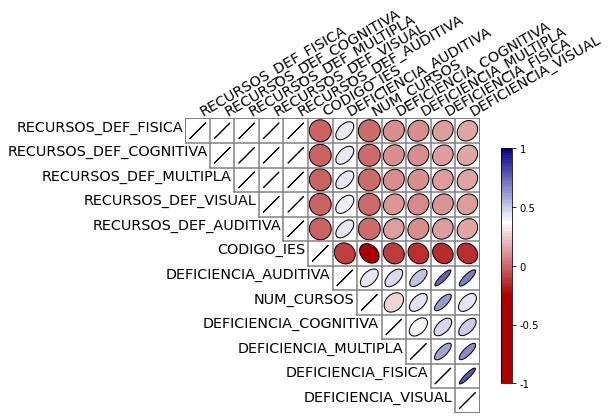

In [26]:
#Observando a correlação entre os dados
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

#Normalização

In [27]:
df.columns

Index(['NUM_CURSOS', 'CODIGO_IES', 'DEFICIENCIA_FISICA', 'DEFICIENCIA_VISUAL',
       'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA',
       'RECURSOS_DEF_FISICA', 'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA',
       'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA'],
      dtype='object')

In [28]:
#Normalização manual
atributos = df.columns
for atributo in atributos:
    df[atributo] = (df[atributo] - min(df[atributo]))/(max(df[atributo]) - min(df[atributo]))

In [29]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_VISUAL,DEFICIENCIA_AUDITIVA,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,0.025551,0.208943,0.020735,0.017354,0.006708,0.008058,0.014151,0.004607,0.003722,0.004453,0.004514,0.004514
std,0.047461,0.265523,0.074208,0.063650,0.035295,0.037930,0.058096,0.028077,0.027657,0.028007,0.028049,0.028049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004315,0.042580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000358,0.000265,0.000418,0.000348,0.000348
50%,0.011866,0.084391,0.001980,0.001623,0.001133,0.000000,0.000000,0.001393,0.001045,0.001259,0.001393,0.001393
75%,0.026969,0.197215,0.009901,0.008117,0.003398,0.003155,0.000000,0.004121,0.003095,0.003650,0.003991,0.003991
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Clusterização dos dados

##1- Usando o K-means

In [33]:
from sklearn.cluster import KMeans

In [34]:
#Agrupando em 4 grupos
agrupador = KMeans(n_clusters = 4)
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
labels = agrupador.labels_
print(labels)

[0 0 0 ... 1 1 1]


In [36]:
#Visualizando os clusters
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['DEFICIENCIA_VISUAL'], y=df['RECURSOS_DEF_VISUAL'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [37]:
#Visualização em três dimensões
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['NUM_CURSOS'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [38]:
#Agrupando em 3 grupos
agrupador = KMeans(n_clusters = 3)
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
labels = agrupador.labels_
print(labels)

[0 0 0 ... 1 1 1]


In [40]:
#Visualizando os clusters
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['DEFICIENCIA_VISUAL'], y=df['RECURSOS_DEF_VISUAL'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

#2 - Usando o algoritmo DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31,
                   min_samples = 10,
                   metric = 'euclidean')
agrupador.fit(df)

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [51]:
#Visualizando o número total de clusters
np.unique(agrupador.labels_)

array([-1,  0])

In [59]:
#Quando reduzimos muito o epsilon, todos os dados são consideradas ruídos. Para se oranizar em clusters é necessário um número mínimo de 15 vizinhos.
agrupador = DBSCAN(eps=2, min_samples = 15, metric = 'euclidean')

# Observações: eps é a máxima distância entre os pontos/ mínimo de pontos é igual a 10/ a métrica de distância considerada'manhattan'
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, ..., 0, 0, 0])